In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Example Phrase 1", "Example Phrase 2"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
df = df.resample("Q").mean()
df

,Example Phrase 1,Example Phrase 2
date,,
2004-03-31,17.666667,64.000000
2004-06-30,56.666667,9.000000
2004-09-30,33.333333,0.000000
2004-12-31,0.000000,0.000000
2005-03-31,0.000000,4.666667
...,...,...
2023-03-31,28.333333,15.333333
2023-06-30,27.333333,14.666667
2023-09-30,21.333333,9.666667


In [10]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X)
sc_X = scaler.transform(X)
sc_X = pd.DataFrame(sc_X)
sc_X.columns = X.columns
sc_X.index = X.index
sc_X

,Example Phrase 1,Example Phrase 2
2004-03-31,1.012500,7.679568
2004-06-30,4.866923,0.640459
2004-09-30,2.560858,-0.511395
2004-12-31,-0.733520,-0.511395
2005-03-31,-0.733520,0.085863
...,...,...
2022-09-30,0.946612,0.555136
2022-12-31,1.869038,1.280378
2023-03-31,2.066701,1.451023
2023-06-30,1.967870,1.365700


# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [13]:
from sklearn.linear_model import Lasso

In [14]:
clf = Lasso(alpha=0.5)


In [15]:
clf.fit(X, y)

Lasso(alpha=0.5)

In [16]:
coefficients = clf.coef_

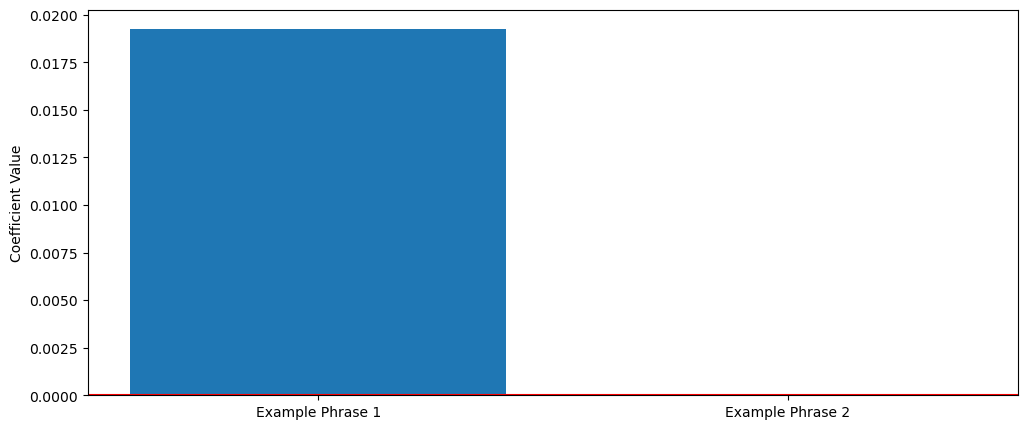

In [17]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X.columns)
plt.axhline(0, color = "red")
plt.ylabel('Coefficient Value')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

In [18]:
from sklearn.linear_model import LassoCV 

In [19]:
modCV = LassoCV().fit(X, y)

In [20]:
modCV.coef_

array([0., 0.])